In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import nnls

In [2]:
spd = np.load("cleandata.npy", allow_pickle=True)
wavelengths = np.arange(360, 831)
mu = np.array([415, 445, 480, 515, 555, 590, 630, 680])
sigma = np.array([11.0403, 12.7388, 15.2866, 16.5605, 16.5605, 16.9851, 21.2314, 22.0807])


In [3]:
class SPDNNLS:
    def __init__(self, spd_data, wavelengths, mu, sigma):
        self.data = spd_data
        self.wavelengths = wavelengths
        self.mu = mu
        self.sigma = sigma

    def Reconstructed_spectrum(self):
        self.filters = np.zeros((len(self.mu), len(self.wavelengths)))
        for i in range(8):
            self.filters[i] = np.exp(-0.5 * ((self.wavelengths - self.mu[i]) / self.sigma[i])**2)
        self.M = self.filters.T
        self.a_hat = np.zeros((self.M.shape[1], self.data.shape[1]))
        for i in range(self.data.shape[1]):
            # NNLS
            self.a_hat[:, i], rnorm = nnls(self.M, self.data[:, i])
        self.reconstructed_spectrum = np.dot(self.M, self.a_hat)
        return self.reconstructed_spectrum, self.a_hat

    def Plot(self, Light):
        # 创建一个包含三个子图的图像
        fig, axs = plt.subplots(3, 1)
        s = self.data[:, Light]
        r = self.reconstructed_spectrum[:, Light]

        # 绘制真实光谱图
        axs[0].plot(self.wavelengths, s, label='True Spectrum')
        axs[0].set_xlabel('Wavelength (nm)')
        axs[0].set_ylabel('Intensity')
        axs[0].set_title('True Spectrum vs Reconstructed Spectrum')
        axs[0].legend()

        # 绘制重建光谱图
        axs[1].plot(self.wavelengths, r, label='Reconstructed Spectrum')
        axs[1].set_xlabel('Wavelength (nm)')
        axs[1].set_ylabel('Intensity')
        axs[1].legend()

        # 绘制重建光谱和真实光谱叠加的图
        axs[2].plot(self.wavelengths, s, label='True Spectrum')
        axs[2].plot(self.wavelengths, r, label='Reconstructed Spectrum')
        axs[2].set_xlabel('Wavelength (nm)')
        axs[2].set_ylabel('Intensity')
        axs[2].legend()

        plt.tight_layout()
        plt.show()

    def Evaluate(self, Light):
        s = self.data[:, Light]
        s_re = self.reconstructed_spectrum[:, Light]
        MAE = np.mean(np.absolute(s - s_re))
        RMSE = np.sqrt(np.mean(np.square(s - s_re)))
        RRMSE = RMSE / np.mean(s_re)

        # GFC
        num = abs(np.sum(s * s_re))
        denom_s = np.sqrt(np.sum(s ** 2) + 1e-9)
        denom_s_re = np.sqrt(np.sum(s_re ** 2) + 1e-9)
        GFC = num / (denom_s * denom_s_re)

        print("MAE: ", MAE)
        print("RMSE: ", RMSE)
        print("RRMES: ", RRMSE)
        print("GFC: ", GFC)

In [4]:
x = SPDNNLS(spd, wavelengths, mu, sigma)

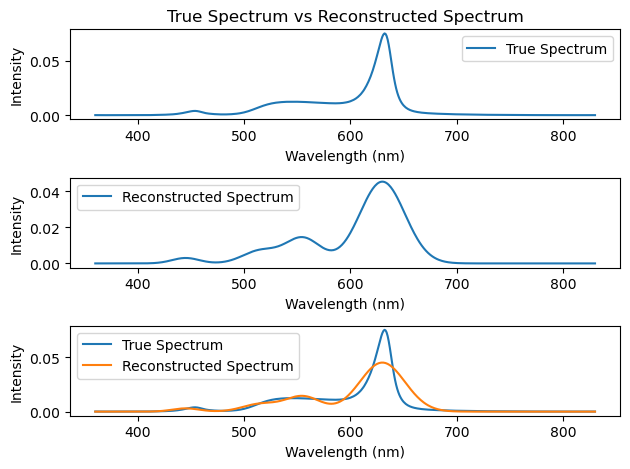

In [6]:
x.Reconstructed_spectrum()
x.Plot(3)

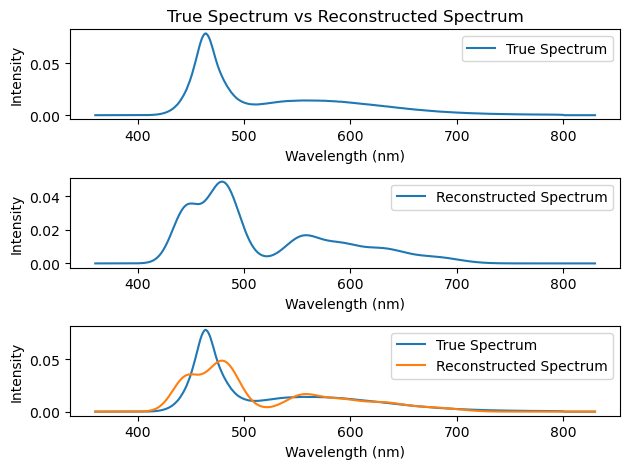

In [14]:
x.Plot(-1)

In [15]:
x.Evaluate(-1)

MAE:  0.0036057651695552387
RMSE:  0.00804891554350563
RRMES:  0.8298527746413954
GFC:  0.892637453649516
